In [1]:
#Importing Mysql Connector, Pandas, matplotlib, numpy 
#and creating connection to MySQL Lahmans database.

import os
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
connection = mysql.connector.connect(
    host="localhost",
    user="root",
    passwd=os.environ.get('SQL_PW'),
    database="lahmansbaseballdb")

In [2]:
#Using SQL query to select active players with 50 or more games
#and commiting to dataframe. Droping rows that are missing values.

active_50games = pd.read_sql_query("""
SELECT * FROM people AS p 
JOIN batting as b 
ON p.playerID = b.playerID 
WHERE active = "Active" AND G >= 50
""", connection)

active_50games.dropna(axis = 0, inplace = True)

In [3]:
#Selecting years 2015 to 2018 and using groupby to determine player with
#greatest number of RBIs.
years2015to2018 = active_50games[(active_50games.yearID >= 2015) & (active_50games.yearID <= 2018)]


RBI = years2015to2018.groupby("nameFull").RBI.sum().sort_values(ascending=False)
print(RBI)

nameFull
Nolan Arenado        503
Edwin Encarnacion    452
Anthony Rizzo        420
Nelson Cruz          414
Paul Goldschmidt     408
                    ... 
Jonathan Holder        0
John Brebbia           0
Joe Smith              0
Joe Kelly              0
A. J. Minter           0
Name: RBI, Length: 487, dtype: int64


In [4]:
#Selecting year 2016 and GIDP value for Albert Pujols.
year2016 = active_50games[active_50games.yearID == 2016]

apGIDP = year2016.loc[year2016.nameFull == 'Albert Pujols', ['nameFull', 'yearID', 'GIDP']]

print(apGIDP)

           nameFull  yearID  GIDP
1995  Albert Pujols    2016    24


Text(0.5, 1.0, '# of Triples per Year')

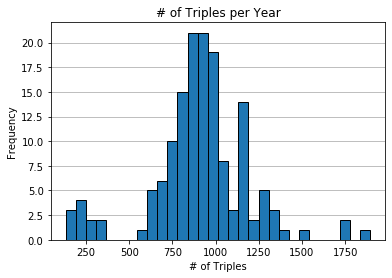

In [5]:
#Creating histogram.
triplesperyear = pd.read_sql_query("""
SELECT SUM(3B) AS Triples, yearID FROM batting
GROUP BY yearID
""", connection)

triplesperyear.dropna(axis = 0, inplace=True)

plot1 = plt.figure(1)
plt.hist(triplesperyear.Triples, bins = 30, edgecolor='black', zorder=2 )
plt.grid(axis = 'y')
plt.xlabel('# of Triples')
plt.ylabel('Frequency')
plt.title('# of Triples per Year')

[[1.         0.62725007]
 [0.62725007 1.        ]]


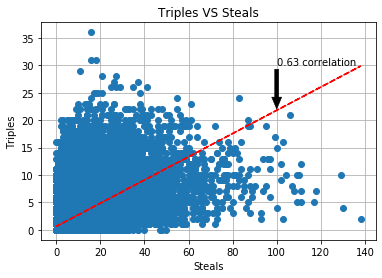

In [6]:
#Creating scatter plot.
triplesandsteals = pd.read_sql_query("""
SELECT 3B AS Triples, SB FROM batting
""", connection)

triplesandsteals.dropna(axis = 0, inplace=True)

plot2 = plt.figure(2)
plt.scatter(triplesandsteals.SB, triplesandsteals.Triples, zorder=2)
plt.grid()
plt.xlabel('Steals')
plt.ylabel('Triples')
plt.title('Triples VS Steals')
z = np.polyfit(triplesandsteals.SB, triplesandsteals.Triples, 1)
p = np.poly1d(z)
plt.plot(triplesandsteals.SB,p(triplesandsteals.SB),"r--")
corr = np.corrcoef(triplesandsteals.SB, triplesandsteals.Triples)
plt.annotate('0.63 correlation', (100, 22), xytext=(100, 30), 
             arrowprops= dict(color='black', headwidth = 10, linewidth=.5))
print(corr)

Text(0.5, 1.0, 'Countries with Highest Average # of HR per Player Per Year in Last 20 Years')

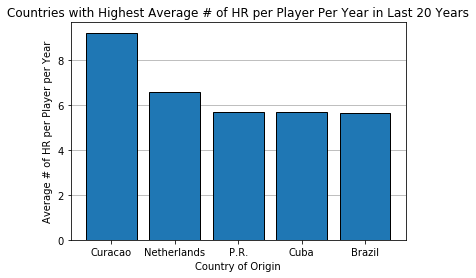

In [7]:
#Addtl Q1: What country of origin has the highest average # 
#of HR per player per year in the last 20 years?
birthcountryandhr = pd.read_sql_query("""
SELECT birthCountry, AVG(HR) AS HR FROM people AS p  
JOIN batting as b  
ON p.playerID = b.playerID 
WHERE yearID > 1999
GROUP BY birthCountry
ORDER BY AVG(HR) DESC
""", connection)

birthcountryandhr.dropna(axis = 0, inplace=True)

plot3 = plt.figure(3)
plt.bar(birthcountryandhr.birthCountry.head(), birthcountryandhr.HR.head(), zorder=2, edgecolor='black')
plt.grid(axis = 'y')
plt.xlabel('Country of Origin')
plt.ylabel('Average # of HR per Player per Year')
plt.title('Countries with Highest Average # of HR per Player Per Year in Last 20 Years')


Text(0.5, 1.0, 'Teams with Highest # of HR per Year in Last 20 Years')

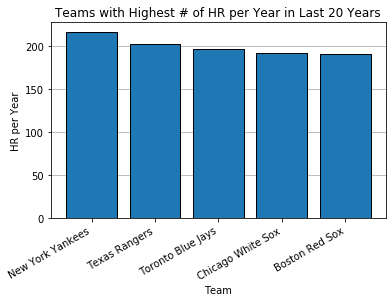

In [8]:
#Addtl Q2: What team has the greatest average of HR per year in the last 20 years?
teamhrsperyear = pd.read_sql_query("""
SELECT name, SUM(HR)/COUNT(yearID) AS HRperYear FROM teams
WHERE yearID > 1999
GROUP BY name
ORDER BY SUM(HR)/COUNT(yearID) DESC
""", connection)

teamhrsperyear.dropna(axis = 0, inplace=True)

plot4 = plt.figure(4)
plt.bar(teamhrsperyear.name.head(), teamhrsperyear.HRperYear.head(), zorder=2, edgecolor='black')
plot4.autofmt_xdate()
plt.grid(axis = 'y')
plt.xlabel('Team')
plt.ylabel('HR per Year')
plt.title('Teams with Highest # of HR per Year in Last 20 Years')

[[1.         0.39537677]
 [0.39537677 1.        ]]


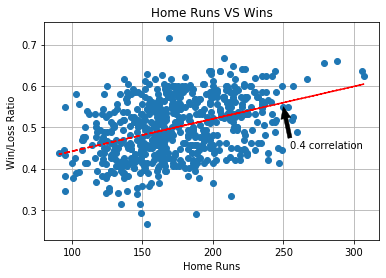

In [9]:
#Addtl Q3: What is the relationship(if any) between HR and wins?
winsandhr = pd.read_sql_query("""
SELECT (W/G) AS WinLossRatio, HR FROM teams
WHERE yearID >= 1999
""", connection)
plot5 = plt.figure(5)
plt.scatter(winsandhr.HR, winsandhr.WinLossRatio, zorder=2)
plt.xlabel('Home Runs')
plt.ylabel ('Win/Loss Ratio')
plt.title ('Home Runs VS Wins')
plt.grid()
z = np.polyfit(winsandhr.HR, winsandhr.WinLossRatio, 1)
p = np.poly1d(z)
plt.plot(winsandhr.HR,p(winsandhr.HR),"r--")
corr = np.corrcoef(winsandhr.HR, winsandhr.WinLossRatio)
plt.annotate('0.4 correlation', (250, .55), xytext=(255, .45), 
             arrowprops= dict(color='black', headwidth = 10, linewidth=.5))
print(corr)

plt.show()